In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

covidDf = pd.read_excel("finalDataset_test.xlsx")

In [2]:
covidDf['Date'] = pd.to_datetime(covidDf['Date'])

In [3]:
qatarDf = pd.DataFrame(columns = ["Date","Cumulative_Cases" , "Cumulative_recovered_cases" ])

# using only 2020 data
filteredDf=qatarDf[(qatarDf['Date']>='2020-02-29')&(qatarDf['Date']<='2020-12-31')]

# from Feb. 2020 till Oct. 2021 (11 @ 2020 + 10 @ 2021)
for i in range(2,23):
    month = (i%13) + int(i/13) 
    year = 2020 + int(i/13)
    temp = covidDf.loc[[covidDf.index[(covidDf['Date'].dt.month == month) & \
                                      (covidDf['Date'].dt.year == year ) ].tolist()[-1]]]
    
    qatarDf.loc[qatarDf.shape[0]]  = [temp['Date'].iloc[0].strftime('%Y-%m-%d')
                                      , temp['Cumulative_Cases'].iloc[0]\
                                      ,temp['Cumulative_recovered_cases'].iloc[0] ] 

 # add permont cases/ test
qatarDf['perMonth_Cases'] = [qatarDf['Cumulative_Cases'].iloc[0] , *np.diff( qatarDf['Cumulative_Cases'] ).tolist()]
qatarDf['perMonth_recovered'] = [qatarDf['Cumulative_recovered_cases'].iloc[0] , *np.diff( qatarDf['Cumulative_recovered_cases'] ).tolist()]
# using only 2021 data


                                                      

In [5]:
filteredDf = qatarDf[(qatarDf['Date']>='2021-01-01')&(qatarDf['Date']<='2021-10-27')]
filteredDf

,Date,Cumulative_Cases,Cumulative_recovered_cases,perMonth_Cases,perMonth_recovered
11,2021-01-31,151335.0,145806,7501.0,4384
12,2021-02-28,163664.0,153621,12329.0,7815
13,2021-03-31,179964.0,164121,16300.0,10500
14,2021-04-30,205652.0,189544,25688.0,25423
15,2021-05-31,217458.0,213336,11806.0,23792
16,2021-06-30,222071.0,219799,4613.0,6463
17,2021-07-31,226239.0,223732,4168.0,3933
18,2021-08-31,232744.0,229523,6505.0,5791
19,2021-09-30,236643.0,234762,3899.0,5239
20,2021-10-27,238845.0,237166,2202.0,2404


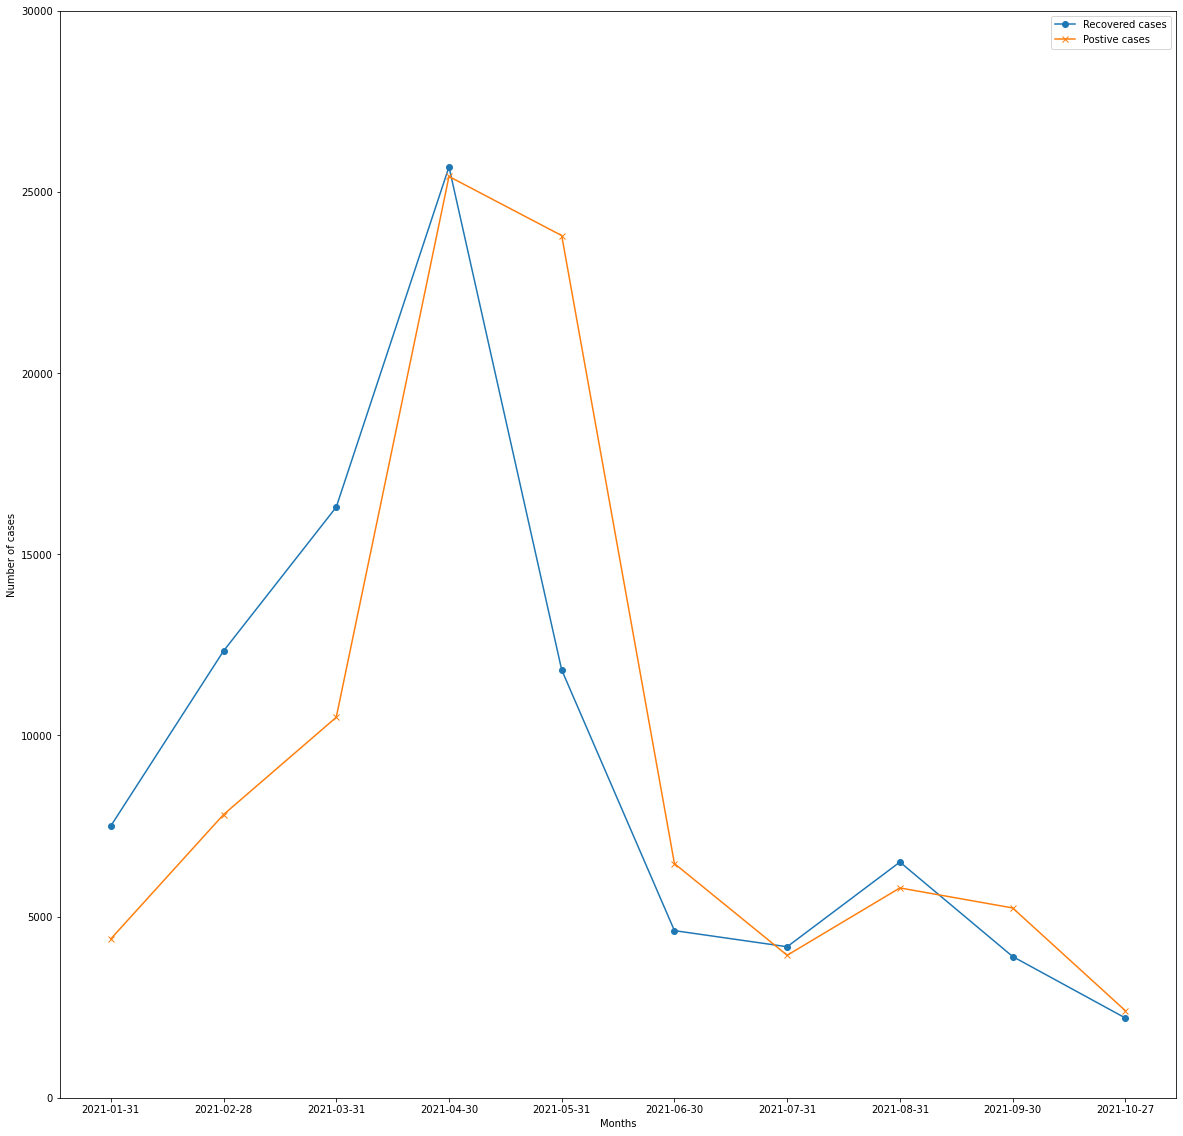

In [6]:
# **************** FIRST GRAPH *********************

months = filteredDf['Date']
recoveredCases = filteredDf['perMonth_recovered']
cases = filteredDf['perMonth_Cases']



plt.figure(figsize=(20,20))
plt.plot(months, cases, marker='o');
plt.plot(months, recoveredCases, marker='x');

plt.ylim(0, 30000)
plt.xlabel('Months')
plt.ylabel('Number of cases')
plt.legend(['Recovered cases', 'Postive cases'])

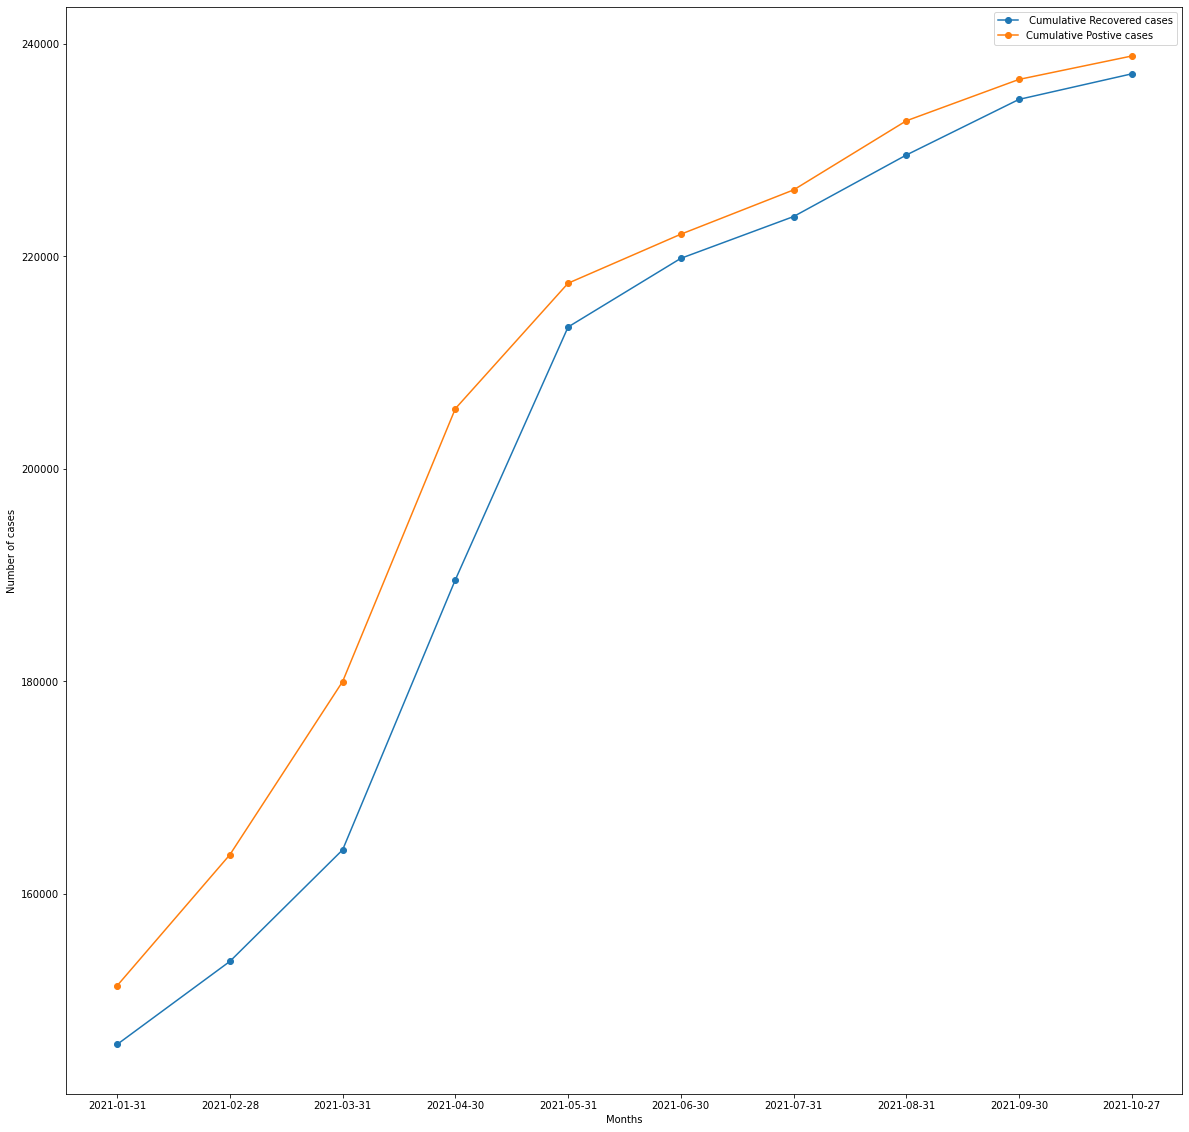

In [8]:
# ******************** SECOND GRAPH ****************
plt.figure(figsize=(20,20))
plt.plot(filteredDf['Date'], filteredDf['Cumulative_recovered_cases'], marker='o');
plt.plot(filteredDf['Date'], filteredDf['Cumulative_Cases'], marker='o');

plt.xlabel('Months')
plt.ylabel('Number of cases')
plt.legend([' Cumulative Recovered cases', 'Cumulative Postive cases'])
